# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# A Lesser-known Feature of Creating Plots with Plotly

Post Link: [Substack](https://avichawla.substack.com/p/a-lesser-known-feature-of-creating)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7050796695885856770/)

Plotly Docs: https://plotly.com/python/animations/

In [1]:
import numpy as np
import pandas as pd
import base64
import plotly.express as px

## Planets data

In [2]:
planets = pd.DataFrame([['Sun', 0, 700000],
                        ['Mercury', 70000000, 2400],
                        ['Venus', 110000000, 6000],
                        ['Earth', 150000000, 6400],
                        ['Mars', 250000000, 3400]],
                     columns = ['planets', 'distance', 'radius'])

planets

planets   distance  radius
0      Sun          0  700000
1  Mercury   70000000    2400
2    Venus  110000000    6000
3    Earth  150000000    6400
4     Mars  250000000    3400

## Maximum time of animation

In [3]:
c = 18000000.0 ## speed of light in km/min

max_distance = planets['distance'].max()
max_time = int(max_distance/c) + 2 

## Position of planets at each minute (this will remain fixed)

In [4]:
planets_position = pd.concat([planets]*max_time) ## the position of planets will remain the same

n_object = len(planets)
planets_position['minutes'] = sum([[i]*n_object for i in range(0,max_time)],[])

planets_position['y_position'] = [0]*len(planets_position)
planets_position.head()

planets   distance  radius  minutes  y_position
0      Sun          0  700000        0           0
1  Mercury   70000000    2400        0           0
2    Venus  110000000    6000        0           0
3    Earth  150000000    6400        0           0
4     Mars  250000000    3400        0           0

## Position of light bubble at each minute

In [5]:
light_position = pd.DataFrame(zip(['Light']*max_time,                 ## Label
                                  [i*c for i in range(0, max_time)],  ## Position
                                  [9000]*max_time,                    ## Size
                                  range(0,max_time),                  ## Location along x axis
                                  [0.2]*max_time),                    ## Location along y axis
                        columns = planets_position.columns)
light_position.head()

planets    distance  radius  minutes  y_position
0   Light         0.0    9000        0         0.2
1   Light  18000000.0    9000        1         0.2
2   Light  36000000.0    9000        2         0.2
3   Light  54000000.0    9000        3         0.2
4   Light  72000000.0    9000        4         0.2

## Location of All Objects (Planets + Light)

In [6]:
all_objects = pd.concat([planets_position, light_position], axis=0)
all_objects.sort_values(by = ['minutes'], inplace=True)
all_objects.reset_index(drop=True, inplace=True)
all_objects.head()

planets     distance  radius  minutes  y_position
0      Sun          0.0  700000        0         0.0
1     Mars  250000000.0    3400        0         0.0
2    Earth  150000000.0    6400        0         0.0
3    Light          0.0    9000        0         0.2
4  Mercury   70000000.0    2400        0         0.0

## Add Text annotation to light

In [7]:
annot_text = []
for e,m in zip(all_objects.planets, all_objects.minutes):
    if e == 'Light':
        if str(m) == "1":
            annot_text.append(str(m)+' min')
        else:
            annot_text.append(str(m)+' mins')
    else:
        annot_text.append(None)

all_objects['annot_text'] = annot_text
all_objects.head()

planets     distance  radius  minutes  y_position annot_text
0      Sun          0.0  700000        0         0.0       None
1     Mars  250000000.0    3400        0         0.0       None
2    Earth  150000000.0    6400        0         0.0       None
3    Light          0.0    9000        0         0.2     0 mins
4  Mercury   70000000.0    2400        0         0.0       None

In [8]:
## Covert unit of distance
all_objects["distance"] = all_objects.distance/10**6

## Plot

The core idea is as follows:

Start the plot with the following data:

In [9]:
all_objects[all_objects.minutes == 0] ## this will be the first frame

planets  distance  radius  minutes  y_position annot_text
0      Sun       0.0  700000        0         0.0       None
1     Mars     250.0    3400        0         0.0       None
2    Earth     150.0    6400        0         0.0       None
3    Light       0.0    9000        0         0.2     0 mins
4  Mercury      70.0    2400        0         0.0       None
5    Venus     110.0    6000        0         0.0       None

In the next frame, get the position of points from minutes=1

In [10]:
all_objects[all_objects.minutes == 1] ## and so on.

planets  distance  radius  minutes  y_position annot_text
6      Mars     250.0    3400        1         0.0       None
7     Earth     150.0    6400        1         0.0       None
8     Light      18.0    9000        1         0.2      1 min
9   Mercury      70.0    2400        1         0.0       None
10      Sun       0.0  700000        1         0.0       None
11    Venus     110.0    6000        1         0.0       None


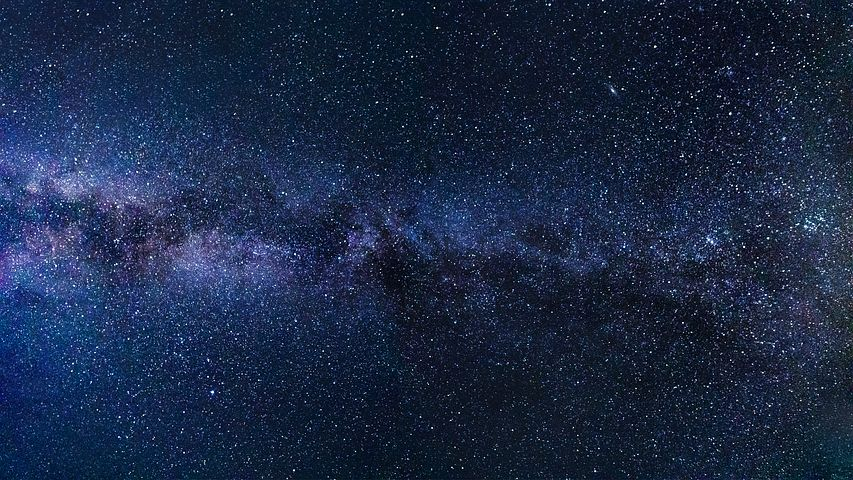
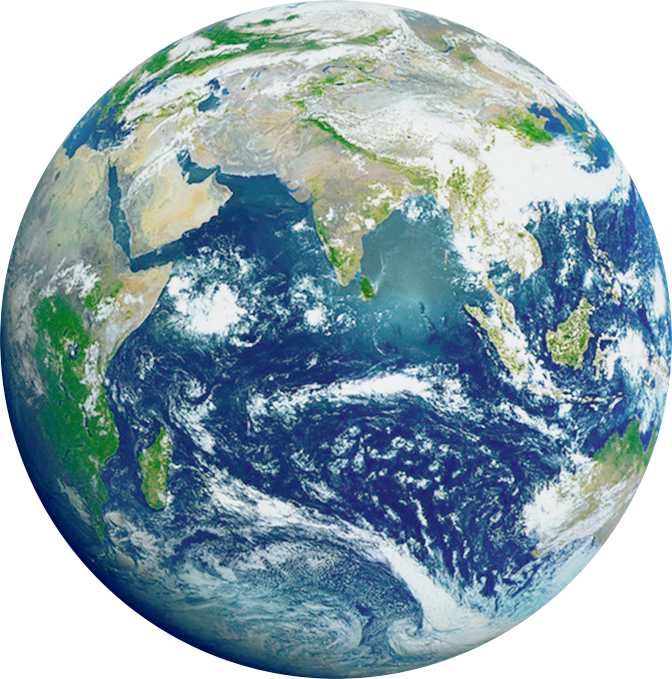
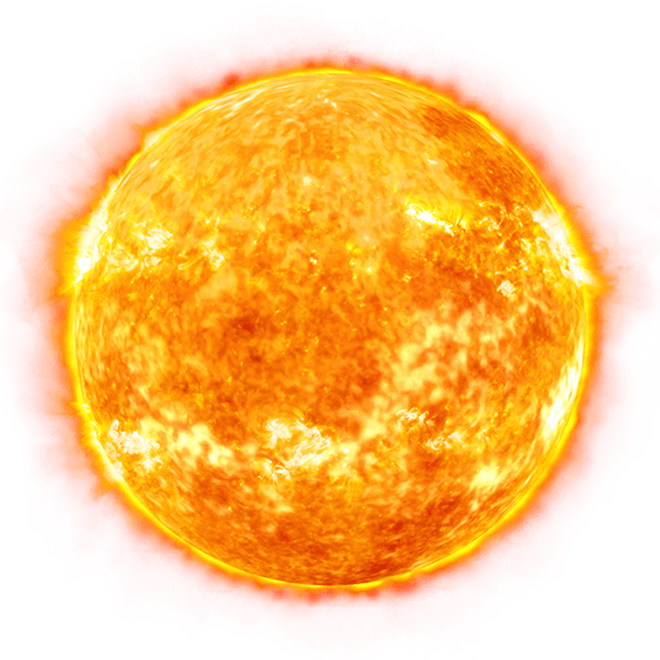
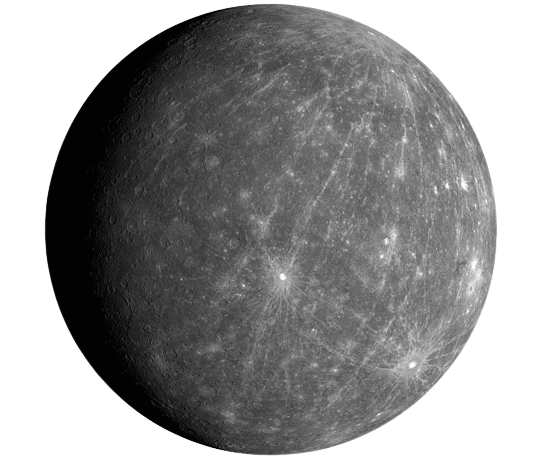
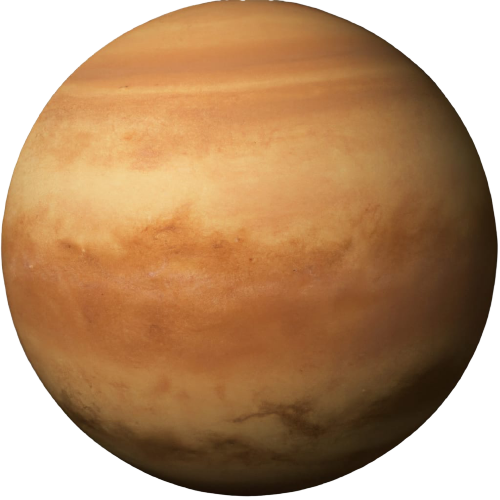
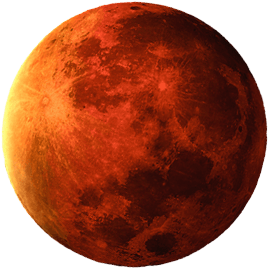

In [11]:
fig = px.scatter(all_objects,                                    ## dataframe to plot
                 x="distance",                                   ## x corrdinate of points at each frame
                 y="y_position",                                 ## y corrdinate of points at each frame
                 animation_frame="minutes",                      ## column to consider for plotting each frame
                 text="annot_text",                              ## Annotation text
                 range_y=[-0.2, 0.25],                           ## Range of y-axis
                 labels={"distance":"Distance(in Million KMs)"}, ## x-axis label
                 color = 'planets',                              ## color based on column planets
                 color_discrete_map={'Light':'white'},           ## color map
                )


# specify text position and marker details
fig.update_traces(textposition='bottom center',
                  textfont_color='white',
                  marker=dict(opacity=1, line=dict(width=0))
                 )


## add images to plots
bg_img_file = '../_Extras/milkyway.jpeg'
bg_img = base64.b64encode(open(bg_img_file, 'rb').read())

earth_img_file = "../_Extras/earth.png"
earth_img = base64.b64encode(open(earth_img_file, 'rb').read())

sun_img_file = "../_Extras/sun.png"
sun_img = base64.b64encode(open(sun_img_file, 'rb').read())

mer_img_file = "../_Extras/mercury.png"
mer_img = base64.b64encode(open(mer_img_file, 'rb').read())

ven_img_file = "../_Extras/venus.png"
ven_img = base64.b64encode(open(ven_img_file, 'rb').read())

mars_img_file = "../_Extras/mars.png"
mars_img = base64.b64encode(open(mars_img_file, 'rb').read())

fig.update_layout(title={
                        'text': "Speed of Light Visualization",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  showlegend=False,
                  xaxis=dict(showgrid=False, visible=True, zeroline=False),
                  yaxis=dict(showgrid=False, visible=False),
                  images= [
                      dict(source='data:image/png;base64,{}'.format(bg_img.decode()),   ## image data
                           xref="paper",         ## reference of the x-coordinate, here the paper
                           yref="paper",         ## reference of the y-coordinate, here the paper
                           x=0,                  ## x position of the image, leftmost point
                           y=1,                  ## y position of the image, topmost point
                           sizex=1,              ## width of the image, in relation to the x-axis of the plot
                           sizey=1,              ## height of the image, in relation to the y-axis of the plot
                           xanchor="left",       ## sets the position of the x-anchor relative to the x-position
                           yanchor="top",        ## sets the position of the y-anchor relative to the y-position
                           sizing="stretch",     ## controls how the image is resized to fit within the specified sizex and sizey
                           opacity = 0.99,       ## opacity level of the image, where 0 is completely transparent and 1 is completely opaque
                           layer="below"),       ## controls the layering of plot elements, where 'below' means the image is below other plot elements
                           
                           dict(source='data:image/png;base64,{}'.format(earth_img.decode()),
                                xref="paper", 
                                yref="paper",
                                x=0.58, 
                                y=0.5,
                                sizex=0.07, 
                                sizey=0.14,
                                xanchor="left", 
                                yanchor="top",
                                sizing="stretch",
                                opacity = 0.99,
                                layer="above"),
                      
                          dict(source='data:image/png;base64,{}'.format(sun_img.decode()),
                               xref="paper", 
                               yref="paper",
                               x=0.0, 
                               y=0.57,
                               sizex=0.15, 
                               sizey=0.3,
                               xanchor="left", 
                               yanchor="top",
                               sizing="stretch",
                               opacity = 0.99,
                               layer="above"),
                          
                          dict(source='data:image/png;base64,{}'.format(mer_img.decode()),
                               xref="paper", 
                               yref="paper",
                               x=0.299, 
                               y=0.46,
                               sizex=0.02, 
                               sizey=0.04,
                               xanchor="left", 
                               yanchor="top",
                               sizing="stretch",
                               opacity = 0.99,
                               layer="above"),
                      
                          dict(source='data:image/png;base64,{}'.format(ven_img.decode()),
                               xref="paper", 
                               yref="paper",
                               x=0.42, 
                               y=0.48,
                               sizex=0.06, 
                               sizey=0.12,
                               xanchor="left", 
                               yanchor="top",
                               sizing="stretch",
                               opacity = 0.99,
                               layer="above"),
                      
                          dict(source='data:image/png;base64,{}'.format(mars_img.decode()),
                               xref="paper", 
                               yref="paper",
                               x=0.94, 
                               y=0.49,
                               sizex=0.04, 
                               sizey=0.08,
                               xanchor="left", 
                               yanchor="top",
                               sizing="stretch",
                               opacity = 0.99,
                               layer="above"),])

## change duration fo animation, 360 millisecond per frame
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300

fig.show()